In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [78]:
alldata=pd.read_csv('alldata.csv')
X = alldata.iloc[:, 2:-1]
y = alldata['mask2_target']

In [79]:
X

,mask1_T2_firstorder_10Percentile,mask1_T2_firstorder_90Percentile,mask1_T2_firstorder_Energy,mask1_T2_firstorder_Entropy,mask1_T2_firstorder_InterquartileRange,mask1_T2_firstorder_Kurtosis,mask1_T2_firstorder_Maximum,mask1_T2_firstorder_Mean,mask1_T2_firstorder_MeanAbsoluteDeviation,mask1_T2_firstorder_Median,...,mask2_T1C_shape_Maximum2DDiameterColumn,mask2_T1C_shape_Maximum2DDiameterRow,mask2_T1C_shape_Maximum2DDiameterSlice,mask2_T1C_shape_Maximum3DDiameter,mask2_T1C_shape_MeshVolume,mask2_T1C_shape_MinorAxisLength,mask2_T1C_shape_Sphericity,mask2_T1C_shape_SurfaceArea,mask2_T1C_shape_SurfaceVolumeRatio,mask2_T1C_shape_VoxelVolume
0,-27.055314,356.797906,4.410430e+09,2.400321,217.036303,3.624453,1022.311768,75.696213,140.572606,-27.009237,...,50.447993,61.351447,45.398238,70.562029,15627.166667,35.143838,0.400258,7552.043463,0.483264,15712.0
1,214.392715,357.957520,2.611016e+09,3.577562,76.179596,4.710394,583.554932,282.198975,46.136255,276.096954,...,29.832868,38.078866,36.496575,38.691084,8602.750000,27.433543,0.335789,6046.563300,0.702864,8614.0
2,115.840350,313.899652,5.332207e+09,3.721719,111.207581,5.196986,664.935913,200.404388,65.036512,181.936340,...,68.007353,54.083269,62.128898,70.292247,30266.125000,45.878526,0.353677,13279.486540,0.438757,30269.0
3,230.381180,379.319794,1.203789e+10,3.487367,84.798477,3.576152,643.513550,309.953546,48.227034,313.305878,...,50.990195,43.416587,43.566042,51.244512,23901.208333,34.653094,0.513594,7812.869268,0.326882,23907.0
4,202.586694,344.998755,6.781100e+09,3.539877,79.344177,5.580291,621.003174,273.928480,47.066982,275.749664,...,68.883960,69.856997,69.892775,71.119618,57413.166667,61.825038,0.267396,26915.571298,0.468805,57481.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,165.944876,273.599365,2.197917e+09,3.787261,59.549683,4.740660,493.877502,221.660418,35.272180,220.972488,...,35.846897,41.593269,43.680659,44.192760,15619.416667,32.452564,0.429674,7032.685505,0.450253,15618.0
534,201.130487,366.907330,5.058073e+09,4.067530,110.261421,1.938879,422.786896,289.593721,54.490110,297.570099,...,24.596748,21.023796,22.803509,27.459060,3287.041667,14.652116,0.795347,1344.201890,0.408940,3309.0
535,192.644516,357.191455,2.158263e+09,3.972628,93.527512,2.564458,474.976959,270.149612,51.973456,264.838348,...,39.824616,31.064449,35.171011,41.340053,8268.958333,27.697500,0.463841,4263.329993,0.515582,8282.0
536,231.422278,453.161768,9.824709e+09,4.325079,121.052948,2.559227,605.962830,351.363746,68.896756,360.532944,...,37.735925,38.600518,38.483763,41.484937,20728.916667,31.377534,0.802087,4549.675526,0.219484,20751.0


In [80]:
# 동일한 값들 제거

cor_set=[]
redundant_set=[]

cor = X.corr()
for i in range(X.shape[1]):
    for j in range(X.shape[1]):
        if cor.iloc[i,j] == 1.0:
            if not cor.index.tolist()[i] == cor.columns.tolist()[j]:
                cor_set.append((cor.index.tolist()[i],cor.columns.tolist()[j]))
                if not (cor.index.tolist()[j],cor.columns.tolist()[i]) in cor_set:
                    redundant_set.append((cor.index.tolist()[i],cor.columns.tolist()[j]))

for (i,j) in redundant_set:
    X.drop([j], axis=1, inplace=True)

In [81]:
X

,mask1_T2_firstorder_10Percentile,mask1_T2_firstorder_90Percentile,mask1_T2_firstorder_Energy,mask1_T2_firstorder_Entropy,mask1_T2_firstorder_InterquartileRange,mask1_T2_firstorder_Kurtosis,mask1_T2_firstorder_Maximum,mask1_T2_firstorder_Mean,mask1_T2_firstorder_MeanAbsoluteDeviation,mask1_T2_firstorder_Median,...,mask2_T1C_glrlm_RunPercentage,mask2_T1C_glrlm_RunVariance,mask2_T1C_glrlm_ShortRunEmphasis,mask2_T1C_glrlm_ShortRunHighGrayLevelEmphasis,mask2_T1C_glrlm_ShortRunLowGrayLevelEmphasis,mask2_T1C_ngtdm_Busyness,mask2_T1C_ngtdm_Coarseness,mask2_T1C_ngtdm_Complexity,mask2_T1C_ngtdm_Contrast,mask2_T1C_ngtdm_Strength
0,-27.055314,356.797906,4.410430e+09,2.400321,217.036303,3.624453,1022.311768,75.696213,140.572606,-27.009237,...,0.889692,0.176537,0.922352,276.783186,0.006240,3.321699,0.000663,913.227386,0.158041,0.217928
1,214.392715,357.957520,2.611016e+09,3.577562,76.179596,4.710394,583.554932,282.198975,46.136255,276.096954,...,0.933659,0.082073,0.950838,250.313661,0.006865,2.486636,0.000877,1184.799322,0.162339,0.299715
2,115.840350,313.899652,5.332207e+09,3.721719,111.207581,5.196986,664.935913,200.404388,65.036512,181.936340,...,0.882904,0.169935,0.912124,190.062784,0.008817,6.350344,0.000360,800.002651,0.089994,0.137472
3,230.381180,379.319794,1.203789e+10,3.487367,84.798477,3.576152,643.513550,309.953546,48.227034,313.305878,...,0.877464,0.188864,0.910129,264.308189,0.005746,3.763352,0.000526,731.259953,0.101650,0.169190
4,202.586694,344.998755,6.781100e+09,3.539877,79.344177,5.580291,621.003174,273.928480,47.066982,275.749664,...,0.817316,0.342173,0.865755,262.094812,0.004351,7.547908,0.000191,568.046041,0.036705,0.087695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,165.944876,273.599365,2.197917e+09,3.787261,59.549683,4.740660,493.877502,221.660418,35.272180,220.972488,...,0.894954,0.147558,0.922995,152.136480,0.012180,3.854371,0.000565,996.490555,0.080536,0.246356
534,201.130487,366.907330,5.058073e+09,4.067530,110.261421,1.938879,422.786896,289.593721,54.490110,297.570099,...,0.886905,0.193042,0.922106,288.997907,0.011178,0.635444,0.003829,828.941181,0.256313,1.246879
535,192.644516,357.191455,2.158263e+09,3.972628,93.527512,2.564458,474.976959,270.149612,51.973456,264.838348,...,0.869077,0.227708,0.909115,162.735674,0.010751,1.769428,0.001206,845.963120,0.075799,0.517934
536,231.422278,453.161768,9.824709e+09,4.325079,121.052948,2.559227,605.962830,351.363746,68.896756,360.532944,...,0.877726,0.183446,0.910690,239.142954,0.006920,3.386339,0.000536,852.252757,0.099229,0.163227


In [82]:
redundant_set

[('mask1_T2_firstorder_Energy', 'mask1_T2_firstorder_TotalEnergy'),
 ('mask1_T2_shape_Elongation', 'mask1_T1C_shape_Elongation'),
 ('mask1_T2_shape_Flatness', 'mask1_T1C_shape_Flatness'),
 ('mask1_T2_shape_LeastAxisLength', 'mask1_T1C_shape_LeastAxisLength'),
 ('mask1_T2_shape_MajorAxisLength', 'mask1_T1C_shape_MajorAxisLength'),
 ('mask1_T2_shape_Maximum2DDiameterColumn',
  'mask1_T1C_shape_Maximum2DDiameterColumn'),
 ('mask1_T2_shape_Maximum2DDiameterRow',
  'mask1_T1C_shape_Maximum2DDiameterRow'),
 ('mask1_T2_shape_Maximum2DDiameterSlice',
  'mask1_T1C_shape_Maximum2DDiameterSlice'),
 ('mask1_T2_shape_Maximum3DDiameter', 'mask1_T1C_shape_Maximum3DDiameter'),
 ('mask1_T2_shape_MeshVolume', 'mask1_T1C_shape_MeshVolume'),
 ('mask1_T2_shape_MinorAxisLength', 'mask1_T1C_shape_MinorAxisLength'),
 ('mask1_T2_shape_Sphericity', 'mask1_T1C_shape_Sphericity'),
 ('mask1_T2_shape_SurfaceArea', 'mask1_T1C_shape_SurfaceArea'),
 ('mask1_T2_shape_SurfaceVolumeRatio', 'mask1_T1C_shape_SurfaceVolumeR

In [83]:
np.random.seed(42)
shuffled_indices=np.random.permutation(X.shape[0])
test_size=int(0.3*X.shape[0])
test_indices=shuffled_indices[:test_size]
train_indices=shuffled_indices[test_size:]
X_train=X.iloc[train_indices]
y_train=y.iloc[train_indices]
X_val=X.iloc[test_indices]
y_val=y.iloc[test_indices]

features_names=X.columns.tolist()

In [84]:
X_train

,mask1_T2_firstorder_10Percentile,mask1_T2_firstorder_90Percentile,mask1_T2_firstorder_Energy,mask1_T2_firstorder_Entropy,mask1_T2_firstorder_InterquartileRange,mask1_T2_firstorder_Kurtosis,mask1_T2_firstorder_Maximum,mask1_T2_firstorder_Mean,mask1_T2_firstorder_MeanAbsoluteDeviation,mask1_T2_firstorder_Median,...,mask2_T1C_glrlm_RunPercentage,mask2_T1C_glrlm_RunVariance,mask2_T1C_glrlm_ShortRunEmphasis,mask2_T1C_glrlm_ShortRunHighGrayLevelEmphasis,mask2_T1C_glrlm_ShortRunLowGrayLevelEmphasis,mask2_T1C_ngtdm_Busyness,mask2_T1C_ngtdm_Coarseness,mask2_T1C_ngtdm_Complexity,mask2_T1C_ngtdm_Contrast,mask2_T1C_ngtdm_Strength
493,195.804970,360.893066,2.359738e+10,3.940744,90.726654,2.757013,539.570618,291.777471,52.879336,306.212997,...,0.849246,0.288409,0.890538,175.194704,0.009433,4.697783,0.000494,589.624758,0.063116,0.199065
479,157.498553,282.589581,1.665695e+09,4.101090,67.922470,3.858885,469.120728,219.138931,39.831151,215.959976,...,0.906004,0.129461,0.931014,216.399716,0.008717,1.892033,0.001181,993.685042,0.130697,0.379600
57,212.488907,364.261536,1.229434e+10,3.686059,88.859955,3.039992,549.688843,291.548780,48.623688,295.386169,...,0.893403,0.155541,0.922397,326.336737,0.003635,5.586940,0.000306,784.831330,0.084632,0.110718
418,191.716306,387.859729,1.273201e+10,4.177512,103.386532,2.982823,516.201660,295.540287,60.221546,304.272751,...,0.842290,0.307021,0.885330,90.016014,0.015946,7.074111,0.000386,649.388830,0.032358,0.266309
24,236.998367,416.959320,8.703231e+09,4.428296,103.775375,2.133565,533.403564,328.687309,55.686750,330.870758,...,0.911434,0.119769,0.935017,233.700936,0.007554,3.463689,0.000647,1015.683287,0.138914,0.213116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,206.549005,322.070349,5.831627e+09,3.723331,70.792488,2.265856,484.085907,265.869885,37.336272,267.672241,...,0.899416,0.154960,0.927504,238.059358,0.008657,0.419222,0.006031,642.904865,0.119368,1.830999
106,196.189098,338.694418,1.803252e+10,4.144205,80.526958,2.342012,459.964661,268.772572,44.385913,270.581772,...,0.901033,0.139767,0.928003,228.650010,0.008053,6.905314,0.000299,868.596110,0.116348,0.102422
270,139.037552,239.113411,1.427073e+09,4.062246,59.011353,2.319821,331.482330,187.555726,31.728938,186.260635,...,0.927458,0.093755,0.946689,216.143027,0.006887,4.734512,0.000457,1178.231082,0.129590,0.162280
435,182.938445,292.307562,6.331895e+08,3.364649,56.846066,5.574295,612.918945,234.650017,34.489472,229.118828,...,0.550401,2.720298,0.700870,110.541904,0.005190,11.612047,0.000131,290.415018,0.005380,0.102658


In [85]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [86]:
X_train

array([[ 0.1300987 ,  0.14687612,  3.48639343, ..., -0.68577954,
        -0.07773074, -0.18261822],
       [-0.64020183, -1.00052674, -0.95537885, ...,  1.12439551,
        -0.01674364, -0.1247659 ],
       [ 0.4655946 ,  0.19623524,  1.19721556, ...,  0.18873865,
        -0.05831425, -0.21092882],
       ...,
       [-1.01143257, -1.63759522, -1.00370649, ...,  1.9511549 ,
        -0.01774281, -0.19440589],
       [-0.12863318, -0.85812644, -1.16448985, ..., -2.02622804,
        -0.12983412, -0.21351159],
       [ 0.92489636,  0.53058809,  0.86018365, ...,  0.47637026,
        -0.05245028, -0.20936721]])

# feature selection

In [20]:
# MI

from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.utils import resample

a=[i for i in range(X_train.shape[0])]
np.random.seed(42)
scores_MI=pd.DataFrame([])

fs = SelectKBest(mutual_info_classif)

for k in range(1000):
    select=np.random.choice(a, size=X_train.shape[0])
    X_chosen=X_train[select,:]
    y_chosen=np.array(y_train.iloc[select])
    fs.fit(X_chosen, y_chosen)
    s=pd.DataFrame(fs.scores_).T
    scores_MI=scores_MI.append(s,ignore_index=True)
    print(k, end=' / ')


0 / 1 / 2 / 3 / 4 / 5 / 6 / 7 / 8 / 9 / 10 / 11 / 12 / 13 / 14 / 15 / 16 / 17 / 18 / 19 / 20 / 21 / 22 / 23 / 24 / 25 / 26 / 27 / 28 / 29 / 30 / 31 / 32 / 33 / 34 / 35 / 36 / 37 / 38 / 39 / 40 / 41 / 42 / 43 / 44 / 45 / 46 / 47 / 48 / 49 / 50 / 51 / 52 / 53 / 54 / 55 / 56 / 57 / 58 / 59 / 60 / 61 / 62 / 63 / 64 / 65 / 66 / 67 / 68 / 69 / 70 / 71 / 72 / 73 / 74 / 75 / 76 / 77 / 78 / 79 / 80 / 81 / 82 / 83 / 84 / 85 / 86 / 87 / 88 / 89 / 90 / 91 / 92 / 93 / 94 / 95 / 96 / 97 / 98 / 99 / 100 / 101 / 102 / 103 / 104 / 105 / 106 / 107 / 108 / 109 / 110 / 111 / 112 / 113 / 114 / 115 / 116 / 117 / 118 / 119 / 120 / 121 / 122 / 123 / 124 / 125 / 126 / 127 / 128 / 129 / 130 / 131 / 132 / 133 / 134 / 135 / 136 / 137 / 138 / 139 / 140 / 141 / 142 / 143 / 144 / 145 / 146 / 147 / 148 / 149 / 150 / 151 / 152 / 153 / 154 / 155 / 156 / 157 / 158 / 159 / 160 / 161 / 162 / 163 / 164 / 165 / 166 / 167 / 168 / 169 / 170 / 171 / 172 / 173 / 174 / 175 / 176 / 177 / 178 / 179 / 180 / 181 / 182 / 183 / 184 / 

In [21]:

result_MI=scores_MI.describe().iloc[1:3,:]
result_MI.columns=features_names
print(result_MI.T)
result_MI.T.to_csv('feature_select_result_MI.csv')

                                            mean       std
mask1_T2_firstorder_10Percentile        0.226639  0.043611
mask1_T2_firstorder_90Percentile        0.199718  0.043190
mask1_T2_firstorder_Energy              0.228788  0.045348
mask1_T2_firstorder_Entropy             0.225098  0.045588
mask1_T2_firstorder_InterquartileRange  0.184098  0.043239
...                                          ...       ...
mask2_T1C_ngtdm_Busyness                0.298729  0.044314
mask2_T1C_ngtdm_Coarseness              0.283350  0.043694
mask2_T1C_ngtdm_Complexity              0.218411  0.044164
mask2_T1C_ngtdm_Contrast                0.197816  0.043827
mask2_T1C_ngtdm_Strength                0.271663  0.041796

[339 rows x 2 columns]


In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline([('fs', SelectKBest(mutual_info_classif)),
                 ('clf', AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), learning_rate=0.5))])

param_grid = {'fs__k': [30,50,70,90],'clf__n_estimators': [50, 100, 200]}

mi_Ada = GridSearchCV(pipe, param_grid, cv=5)
mi_Ada.fit(X_train, y_train)
print(mi_Ada.best_estimator_)

C:\Users\Bio\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Pipeline(memory=None,
         steps=[('fs',
                 SelectKBest(k=50,
                             score_func=<function mutual_info_classif at 0x0000029DF5057828>)),
                ('clf',
                 AdaBoostClassifier(algorithm='SAMME.R',
                                    base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                          criterion='gini',
                                                                          max_depth=1,
                                                                          max_features=None,
                                                                          max_leaf_nodes=None,
                                                                          min_impurity_decrease=0.0,
                                                                          min_impurity_split=None,
                                                                          min_sampl

In [24]:

selected_features_MI=list(scores_MI.describe().loc['mean'].sort_values(ascending=[False]).head(50).index)
print(selected_features_MI)
selected_features_name_MI=[]
for i in selected_features_MI:
    selected_features_name_MI.append(features_names[i])
print(selected_features_name_MI)

[276, 227, 334, 261, 275, 259, 88, 281, 335, 256, 217, 170, 254, 15, 332, 229, 295, 269, 246, 197, 277, 258, 302, 71, 24, 338, 327, 321, 244, 14, 33, 38, 310, 67, 107, 10, 198, 172, 17, 6, 271, 178, 176, 333, 263, 320, 182, 202, 28, 257]
['mask2_T1C_firstorder_Skewness', 'mask2_T2_glrlm_GrayLevelNonUniformity', 'mask2_T1C_ngtdm_Busyness', 'mask2_T2_shape_VoxelVolume', 'mask2_T1C_firstorder_RootMeanSquared', 'mask2_T2_shape_SurfaceArea', 'mask1_T2_shape_Sphericity', 'mask2_T1C_glcm_ClusterShade', 'mask2_T1C_ngtdm_Coarseness', 'mask2_T2_shape_MeshVolume', 'mask2_T2_glszm_LargeAreaLowGrayLevelEmphasis', 'mask2_T2_firstorder_10Percentile', 'mask2_T2_shape_Maximum2DDiameterSlice', 'mask1_T2_firstorder_Uniformity', 'mask2_T1C_glrlm_ShortRunHighGrayLevelEmphasis', 'mask2_T2_glrlm_GrayLevelVariance', 'mask2_T1C_glcm_JointAverage', 'mask2_T1C_firstorder_Mean', 'mask2_T2_ngtdm_Contrast', 'mask2_T2_glcm_Idm', 'mask2_T1C_firstorder_Uniformity', 'mask2_T2_shape_Sphericity', 'mask2_T1C_glszm_GrayLev

In [25]:

y_pred=mi_Ada.predict(X_val)
accuracy_score(y_val, y_pred)

0.5962732919254659

In [26]:
# F-score
from sklearn.feature_selection import f_classif

a=[i for i in range(X_train.shape[0])]
np.random.seed(42)
scores_F=pd.DataFrame([])

fs= SelectKBest(f_classif)

for k in range(1000):
    select=np.random.choice(a, size=X_train.shape[0])
    X_chosen=X_train[select,:]
    y_chosen=np.array(y_train.iloc[select])
    fs.fit(X_chosen, y_chosen)
    s=pd.DataFrame(fs.scores_).T
    scores_F=scores_F.append(s,ignore_index=True)
    print(k, end=' / ')

result_F=scores_F.describe().iloc[1:3,:]
result_F.columns=features_names
print(result_F.T)
result_F.T.to_csv('feature_select_result_Fscore.csv')


0 / 1 / 2 / 3 / 4 / 5 / 6 / 7 / 8 / 9 / 10 / 11 / 12 / 13 / 14 / 15 / 16 / 17 / 18 / 19 / 20 / 21 / 22 / 23 / 24 / 25 / 26 / 27 / 28 / 29 / 30 / 31 / 32 / 33 / 34 / 35 / 36 / 37 / 38 / 39 / 40 / 41 / 42 / 43 / 44 / 45 / 46 / 47 / 48 / 49 / 50 / 51 / 52 / 53 / 54 / 55 / 56 / 57 / 58 / 59 / 60 / 61 / 62 / 63 / 64 / 65 / 66 / 67 / 68 / 69 / 70 / 71 / 72 / 73 / 74 / 75 / 76 / 77 / 78 / 79 / 80 / 81 / 82 / 83 / 84 / 85 / 86 / 87 / 88 / 89 / 90 / 91 / 92 / 93 / 94 / 95 / 96 / 97 / 98 / 99 / 100 / 101 / 102 / 103 / 104 / 105 / 106 / 107 / 108 / 109 / 110 / 111 / 112 / 113 / 114 / 115 / 116 / 117 / 118 / 119 / 120 / 121 / 122 / 123 / 124 / 125 / 126 / 127 / 128 / 129 / 130 / 131 / 132 / 133 / 134 / 135 / 136 / 137 / 138 / 139 / 140 / 141 / 142 / 143 / 144 / 145 / 146 / 147 / 148 / 149 / 150 / 151 / 152 / 153 / 154 / 155 / 156 / 157 / 158 / 159 / 160 / 161 / 162 / 163 / 164 / 165 / 166 / 167 / 168 / 169 / 170 / 171 / 172 / 173 / 174 / 175 / 176 / 177 / 178 / 179 / 180 / 181 / 182 / 183 / 184 / 

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline([('fs', SelectKBest(f_classif)),
                 ('clf', AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), learning_rate=0.5))])

param_grid = {'fs__k': [30,50,70,90],'clf__n_estimators': [50, 100, 200]}

F_Ada = GridSearchCV(pipe, param_grid, cv=5)
F_Ada.fit(X_train, y_train)
print(F_Ada.best_estimator_)


C:\Users\Bio\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Pipeline(memory=None,
         steps=[('fs',
                 SelectKBest(k=70,
                             score_func=<function f_classif at 0x0000029DF4F25678>)),
                ('clf',
                 AdaBoostClassifier(algorithm='SAMME.R',
                                    base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                          criterion='gini',
                                                                          max_depth=1,
                                                                          max_features=None,
                                                                          max_leaf_nodes=None,
                                                                          min_impurity_decrease=0.0,
                                                                          min_impurity_split=None,
                                                                          min_samples_leaf=1,

In [28]:
selected_features_F=list(scores_F.describe().loc['mean'].sort_values(ascending=[False]).head(70).index)
print(selected_features_F)
selected_features_name_F=[]
for i in selected_features_F:
    selected_features_name_F.append(features_names[i])
print(selected_features_name_F)

y_pred=F_Ada.predict(X_val)
accuracy_score(y_val, y_pred)

[258, 276, 259, 302, 334, 281, 271, 251, 327, 262, 88, 326, 24, 35, 257, 27, 29, 279, 26, 23, 269, 252, 14, 97, 181, 135, 295, 227, 310, 71, 275, 17, 176, 254, 172, 323, 267, 93, 321, 58, 250, 261, 256, 33, 38, 39, 205, 60, 253, 173, 3, 11, 28, 255, 332, 194, 21, 197, 318, 196, 245, 107, 190, 10, 319, 96, 100, 104, 150, 265]
['mask2_T2_shape_Sphericity', 'mask2_T1C_firstorder_Skewness', 'mask2_T2_shape_SurfaceArea', 'mask2_T1C_glszm_GrayLevelNonUniformity', 'mask2_T1C_ngtdm_Busyness', 'mask2_T1C_glcm_ClusterShade', 'mask2_T1C_firstorder_Median', 'mask2_T2_shape_MajorAxisLength', 'mask2_T1C_glrlm_RunLengthNonUniformity', 'mask2_T1C_firstorder_10Percentile', 'mask1_T2_shape_Sphericity', 'mask2_T1C_glrlm_RunEntropy', 'mask1_T2_glcm_DifferenceEntropy', 'mask1_T2_glcm_JointEntropy', 'mask2_T2_shape_MinorAxisLength', 'mask1_T2_glcm_Idm', 'mask1_T2_glcm_Idn', 'mask2_T1C_glcm_Autocorrelation', 'mask1_T2_glcm_Id', 'mask1_T2_glcm_DifferenceAverage', 'mask2_T1C_firstorder_Mean', 'mask2_T2_shape_M

0.6086956521739131

In [29]:
#RFECV
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

Ada=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), learning_rate=0.5, n_estimators=200)
rfe = RFECV(estimator=Ada, step=1, cv=5)

rfe.fit(X_train, y_train)
print(rfe.n_features_)



61


In [35]:
selected_features_name_RFE=[b for a, b in zip(rfe.support_, features_names) if a]
selected_features_name_RFE_df=pd.DataFrame(selected_features_name_RFE)
selected_features_name_RFE_df.to_csv('feature_select_result_RFE.csv')
selected_features_name_RFE_df

,0
0,mask1_T2_firstorder_10Percentile
1,mask1_T2_firstorder_InterquartileRange
2,mask1_T2_glcm_Autocorrelation
3,mask1_T2_glcm_Idn
4,mask1_T2_glcm_Imc2
...,...
56,mask2_T1C_glszm_GrayLevelNonUniformity
57,mask2_T1C_glszm_SizeZoneNonUniformity
58,mask2_T1C_glrlm_RunEntropy
59,mask2_T1C_ngtdm_Busyness


In [31]:
rfe.score(X_val, y_val)

0.6645962732919255

In [49]:
## Random forest

from sklearn.ensemble import RandomForestClassifier

a=[i for i in range(X_train.shape[0])]
np.random.seed(42)
scores_RF=pd.DataFrame([])

fs= RandomForestClassifier()

for k in range(1000):
    select=np.random.choice(a, size=X_train.shape[0])
    X_chosen=X_train[select,:]
    y_chosen=np.array(y_train.iloc[select])
    fs.fit(X_chosen, y_chosen)
    s=pd.DataFrame(fs.feature_importances_).T
    scores_RF=scores_RF.append(s,ignore_index=True)
    print(k, end=' / ')

C:\Users\Bio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0 / 1 / 2 / 3 / 4 / 5 / 6 / 7 / 8 / 9 / 10 / 11 / 12 / 13 / 14 / 15 / 16 / 17 / 18 / 19 / 20 / 21 / 22 / 23 / 24 / 25 / 26 / 27 / 28 / 29 / 30 / 31 / 32 / 33 / 34 / 35 / 36 / 37 / 38 / 39 / 40 / 41 / 42 / 43 / 44 / 45 / 46 / 47 / 48 / 49 / 50 / 51 / 52 / 53 / 54 / 55 / 56 / 57 / 58 / 59 / 60 / 61 / 62 / 63 / 64 / 65 / 66 / 67 / 68 / 69 / 70 / 71 / 72 / 73 / 74 / 75 / 76 / 77 / 78 / 79 / 80 / 81 / 82 / 83 / 84 / 85 / 86 / 87 / 88 / 89 / 90 / 91 / 92 / 93 / 94 / 95 / 96 / 97 / 98 / 99 / 100 / 101 / 102 / 103 / 104 / 105 / 106 / 107 / 108 / 109 / 110 / 111 / 112 / 113 / 114 / 115 / 116 / 117 / 118 / 119 / 120 / 121 / 122 / 123 / 124 / 125 / 126 / 127 / 128 / 129 / 130 / 131 / 132 / 133 / 134 / 135 / 136 / 137 / 138 / 139 / 140 / 141 / 142 / 143 / 144 / 145 / 146 / 147 / 148 / 149 / 150 / 151 / 152 / 153 / 154 / 155 / 156 / 157 / 158 / 159 / 160 / 161 / 162 / 163 / 164 / 165 / 166 / 167 / 168 / 169 / 170 / 171 / 172 / 173 / 174 / 175 / 176 / 177 / 178 / 179 / 180 / 181 / 182 / 183 / 184 / 

In [52]:
result_RF=scores_RF.describe().iloc[1:3,:]
result_RF.columns=features_names
print(result_RF.T)
result_RF.T.to_csv('feature_select_result_RF.csv')

                                            mean       std
mask1_T2_firstorder_10Percentile        0.003245  0.003533
mask1_T2_firstorder_90Percentile        0.001669  0.002215
mask1_T2_firstorder_Energy              0.002400  0.003032
mask1_T2_firstorder_Entropy             0.003021  0.004178
mask1_T2_firstorder_InterquartileRange  0.001540  0.002171
...                                          ...       ...
mask2_T1C_ngtdm_Busyness                0.006101  0.006832
mask2_T1C_ngtdm_Coarseness              0.005260  0.006757
mask2_T1C_ngtdm_Complexity              0.003079  0.003545
mask2_T1C_ngtdm_Contrast                0.002281  0.003053
mask2_T1C_ngtdm_Strength                0.006278  0.007798

[339 rows x 2 columns]


In [54]:
selected_features_RF=list(scores_RF.describe().loc['mean'].sort_values(ascending=[False]).head(70).index)
print(selected_features_RF)
selected_features_name_RF=[]
for i in selected_features_RF:
    selected_features_name_RF.append(features_names[i])
print(selected_features_name_RF)



[276, 93, 258, 251, 281, 259, 267, 302, 338, 97, 19, 334, 14, 255, 170, 88, 254, 172, 335, 326, 176, 100, 271, 262, 323, 90, 252, 204, 205, 27, 277, 104, 96, 249, 24, 105, 135, 106, 246, 63, 29, 299, 269, 108, 257, 38, 304, 180, 17, 296, 275, 181, 26, 23, 279, 33, 327, 300, 71, 101, 307, 319, 248, 185, 245, 124, 227, 295, 35, 99]
['mask2_T1C_firstorder_Skewness', 'mask1_T1C_firstorder_90Percentile', 'mask2_T2_shape_Sphericity', 'mask2_T2_shape_MajorAxisLength', 'mask2_T1C_glcm_ClusterShade', 'mask2_T2_shape_SurfaceArea', 'mask2_T1C_firstorder_Kurtosis', 'mask2_T1C_glszm_GrayLevelNonUniformity', 'mask2_T1C_ngtdm_Strength', 'mask1_T1C_firstorder_Kurtosis', 'mask1_T2_glcm_ClusterShade', 'mask2_T1C_ngtdm_Busyness', 'mask1_T2_firstorder_Skewness', 'mask2_T2_shape_Maximum3DDiameter', 'mask2_T2_firstorder_10Percentile', 'mask1_T2_shape_Sphericity', 'mask2_T2_shape_Maximum2DDiameterSlice', 'mask2_T2_firstorder_Energy', 'mask2_T1C_ngtdm_Coarseness', 'mask2_T1C_glrlm_RunEntropy', 'mask2_T2_first

In [87]:
## L1-based feature selection from model

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(estimator=LogisticRegression())
selector.fit(X_train, y_train)
X_new = selector.transform(X_train)

X_new.shape

C:\Users\Bio\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bio\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


(377, 153)

In [88]:
y_pred=selector.estimator_.predict(X_val)
accuracy_score(y_val, y_pred)

0.7204968944099379

In [89]:
selected_features_name_l1=[b for a, b in zip(selector.get_support(), features_names) if a]
selected_features_name_l1_df=pd.DataFrame(selected_features_name_l1)
selected_features_name_l1_df.to_csv('feature_select_result_l1.csv')
selected_features_name_l1_df

,0
0,mask1_T2_firstorder_10Percentile
1,mask1_T2_firstorder_90Percentile
2,mask1_T2_firstorder_Energy
3,mask1_T2_firstorder_Mean
4,mask1_T2_firstorder_Median
...,...
148,mask2_T1C_glrlm_RunLengthNonUniformityNormalized
149,mask2_T1C_glrlm_ShortRunEmphasis
150,mask2_T1C_glrlm_ShortRunHighGrayLevelEmphasis
151,mask2_T1C_ngtdm_Complexity


# frequently selected features 

In [90]:
all_selected_features=dict()
for i in [selected_features_name_MI, selected_features_name_F, selected_features_name_RFE, selected_features_name_RF, selected_features_name_l1]:
    for feature in i:
        all_selected_features[feature] = all_selected_features.get(feature,0) + 1
all_selected_features

{'mask2_T1C_firstorder_Skewness': 5,
 'mask2_T2_glrlm_GrayLevelNonUniformity': 3,
 'mask2_T1C_ngtdm_Busyness': 4,
 'mask2_T2_shape_VoxelVolume': 2,
 'mask2_T1C_firstorder_RootMeanSquared': 3,
 'mask2_T2_shape_SurfaceArea': 3,
 'mask1_T2_shape_Sphericity': 4,
 'mask2_T1C_glcm_ClusterShade': 4,
 'mask2_T1C_ngtdm_Coarseness': 2,
 'mask2_T2_shape_MeshVolume': 2,
 'mask2_T2_glszm_LargeAreaLowGrayLevelEmphasis': 1,
 'mask2_T2_firstorder_10Percentile': 3,
 'mask2_T2_shape_Maximum2DDiameterSlice': 4,
 'mask1_T2_firstorder_Uniformity': 1,
 'mask2_T1C_glrlm_ShortRunHighGrayLevelEmphasis': 3,
 'mask2_T2_glrlm_GrayLevelVariance': 2,
 'mask2_T1C_glcm_JointAverage': 4,
 'mask2_T1C_firstorder_Mean': 3,
 'mask2_T2_ngtdm_Contrast': 3,
 'mask2_T2_glcm_Idm': 2,
 'mask2_T1C_firstorder_Uniformity': 3,
 'mask2_T2_shape_Sphericity': 4,
 'mask2_T1C_glszm_GrayLevelNonUniformity': 4,
 'mask1_T2_glrlm_ShortRunHighGrayLevelEmphasis': 3,
 'mask1_T2_glcm_DifferenceEntropy': 3,
 'mask2_T1C_ngtdm_Strength': 2,
 'mask

In [91]:
frequent_features=dict((k, v) for k, v in all_selected_features.items() if v >= 4)
frequent_features={k: v for k, v in sorted(frequent_features.items(), key=lambda item: item[1])}
frequent_features_list=list(frequent_features.keys())
frequent_features=pd.DataFrame.from_dict(frequent_features, orient='index')

In [92]:
frequent_features

,0
mask2_T1C_ngtdm_Busyness,4
mask1_T2_shape_Sphericity,4
mask2_T1C_glcm_ClusterShade,4
mask2_T2_shape_Maximum2DDiameterSlice,4
mask2_T1C_glcm_JointAverage,4
mask2_T2_shape_Sphericity,4
mask2_T1C_glszm_GrayLevelNonUniformity,4
mask1_T2_glcm_JointAverage,4
mask2_T1C_glszm_SizeZoneNonUniformity,4
mask2_T2_firstorder_Energy,4


In [93]:
frequent_features.to_csv('frequent_features_0124.csv')

# feature visualization

In [129]:
alldata=pd.read_csv('alldata.csv')
X = alldata.iloc[:, 2:]
y = alldata['mask2_target']

np.random.seed(42)
shuffled_indices=np.random.permutation(X.shape[0])
test_size=int(0.3*X.shape[0])
test_indices=shuffled_indices[:test_size]
train_indices=shuffled_indices[test_size:]
X_train=X.iloc[train_indices]
y_train=y.iloc[train_indices]
X_val=X.iloc[test_indices]
y_val=y.iloc[test_indices]

frequent_features = pd.read_csv('frequent_features_0124.csv')

In [130]:
X_train

,mask1_T2_firstorder_10Percentile,mask1_T2_firstorder_90Percentile,mask1_T2_firstorder_Energy,mask1_T2_firstorder_Entropy,mask1_T2_firstorder_InterquartileRange,mask1_T2_firstorder_Kurtosis,mask1_T2_firstorder_Maximum,mask1_T2_firstorder_Mean,mask1_T2_firstorder_MeanAbsoluteDeviation,mask1_T2_firstorder_Median,...,mask2_T1C_shape_Maximum2DDiameterRow,mask2_T1C_shape_Maximum2DDiameterSlice,mask2_T1C_shape_Maximum3DDiameter,mask2_T1C_shape_MeshVolume,mask2_T1C_shape_MinorAxisLength,mask2_T1C_shape_Sphericity,mask2_T1C_shape_SurfaceArea,mask2_T1C_shape_SurfaceVolumeRatio,mask2_T1C_shape_VoxelVolume,mask2_target
493,195.804970,360.893066,2.359738e+10,3.940744,90.726654,2.757013,539.570618,291.777471,52.879336,306.212997,...,73.878278,60.083276,83.582295,29600.500000,39.097907,0.486816,9505.733607,0.321134,29655.0,meta
479,157.498553,282.589581,1.665695e+09,4.101090,67.922470,3.858885,469.120728,219.138931,39.831151,215.959976,...,33.241540,29.832868,33.526109,8321.791667,22.400863,0.704546,2818.723966,0.338716,8331.0,meta
57,212.488907,364.261536,1.229434e+10,3.686059,88.859955,3.039992,549.688843,291.548780,48.623688,295.386169,...,75.742986,48.166378,85.005882,30941.041667,40.595078,0.328702,14500.142506,0.468638,30916.0,GBM
418,191.716306,387.859729,1.273201e+10,4.177512,103.386532,2.982823,516.201660,295.540287,60.221546,304.272751,...,62.769419,55.569776,63.411355,25323.333333,49.453397,0.250557,16644.002678,0.657260,25463.0,meta
24,236.998367,416.959320,8.703231e+09,4.428296,103.775375,2.133565,533.403564,328.687309,55.686750,330.870758,...,50.000000,41.484937,52.354560,14478.000000,26.174983,0.462631,6209.475274,0.428890,14476.0,GBM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,206.549005,322.070349,5.831627e+09,3.723331,70.792488,2.265856,484.085907,265.869885,37.336272,267.672241,...,21.954498,18.439089,22.516660,2231.416667,14.013195,0.769515,1073.133965,0.480920,2253.0,GBM
106,196.189098,338.694418,1.803252e+10,4.144205,80.526958,2.342012,459.964661,268.772572,44.385913,270.581772,...,53.851648,55.108983,63.079315,36113.416667,42.033250,0.454012,11637.580312,0.322251,36103.0,GBM
270,139.037552,239.113411,1.427073e+09,4.062246,59.011353,2.319821,331.482330,187.555726,31.728938,186.260635,...,49.979996,46.389654,52.048055,14621.458333,44.414681,0.273285,10581.046386,0.723666,14645.0,GBM
435,182.938445,292.307562,6.331895e+08,3.364649,56.846066,5.574295,612.918945,234.650017,34.489472,229.118828,...,77.878110,74.793048,89.716219,106998.416667,52.719747,0.550925,19783.789753,0.184898,107060.0,meta


In [131]:
alldata_GBM=X_train.loc[X_train['mask2_target']=='GBM',:]
alldata_lymphoma=X_train.loc[X_train['mask2_target']=='lymphoma',:]
alldata_meta=X_train.loc[X_train['mask2_target']=='meta',:]


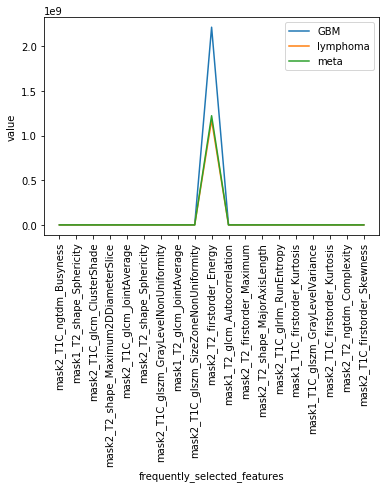

In [132]:

frequent_features_list=list(frequent_features.iloc[:,0])

GBM_selected_summary=alldata_GBM[frequent_features_list].describe()
lymphoma_selected_summary=alldata_lymphoma[frequent_features_list].describe()
meta_selected_summary=alldata_meta[frequent_features_list].describe()

GBM_selected_summary.to_csv('GBM_selected_summary_0124.csv')
lymphoma_selected_summary.to_csv('lymphoma_selected_summary_0124.csv')
meta_selected_summary.to_csv('meta_selected_summary_0124.csv')

x = frequent_features_list
G = GBM_selected_summary.loc['mean']
L = lymphoma_selected_summary.loc['mean']
M = meta_selected_summary.loc['mean']

plt.plot(x, G, label='GBM')
plt.plot(x, L, label='lymphoma')
plt.plot(x, M, label='meta')
plt.xlabel('frequently_selected_features')
plt.ylabel('value')
plt.legend()
plt.xticks(rotation=90)
plt.show()

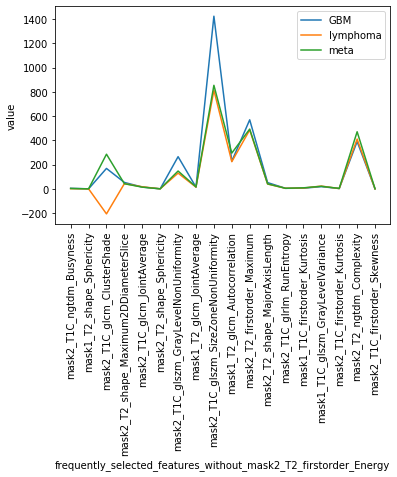

In [133]:
frequent_features_list.remove('mask2_T2_firstorder_Energy')
x = frequent_features_list
G = GBM_selected_summary.drop(['mask2_T2_firstorder_Energy'], axis=1).loc['mean']
L = lymphoma_selected_summary.drop(['mask2_T2_firstorder_Energy'], axis=1).loc['mean']
M = meta_selected_summary.drop(['mask2_T2_firstorder_Energy'], axis=1).loc['mean']

plt.plot(x, G, label='GBM')
plt.plot(x, L, label='lymphoma')
plt.plot(x, M, label='meta')
plt.xlabel('frequently_selected_features_without_mask2_T2_firstorder_Energy')
plt.ylabel('value')
plt.legend()
plt.xticks(rotation=90)
plt.show()